In [1]:
# We'll be testing the trainer class here and fixing stuff wherever necessary

# added library folder to path for notebook
import sys  
sys.path.insert(0, './gray_lib')

In [2]:
# imported all contents
from gray_lib import *

In [3]:
# import other modules
from mnist import MNIST
import random

In [4]:
# Load data
mndata = MNIST('samples')
mndata.gz = True

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

train_images = [zeroesAnd255s(img) for img in train_images]
test_images = [zeroesAnd255s(img) for img in test_images]

In [5]:
# Define a trainer instance
trainer = Trainer(x_train=train_images,y_train=train_labels,x_test=test_images,y_test=test_labels)

In [6]:
# create a model
trainer.create_model()

In [7]:
# compile model
trainer.compile_model()

('compiling model', <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000134D1321BE0>)
('model compiled successfully',)


In [8]:
# summarise
trainer.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train the model
trainer.train(epochs=50)

Train on 124800 samples
Epoch 1/50
124800/124800 - 21s - loss: 0.8074 - accuracy: 0.7561
Epoch 2/50
124800/124800 - 12s - loss: 0.4788 - accuracy: 0.8489
Epoch 3/50
124800/124800 - 9s - loss: 0.4008 - accuracy: 0.8690
Epoch 4/50
124800/124800 - 9s - loss: 0.3533 - accuracy: 0.8841
Epoch 5/50
124800/124800 - 10s - loss: 0.3197 - accuracy: 0.8932
Epoch 6/50
124800/124800 - 9s - loss: 0.2930 - accuracy: 0.9016
Epoch 7/50
124800/124800 - 9s - loss: 0.2714 - accuracy: 0.9076
Epoch 8/50
124800/124800 - 9s - loss: 0.2527 - accuracy: 0.9127
Epoch 9/50
124800/124800 - 9s - loss: 0.2366 - accuracy: 0.9170
Epoch 10/50
124800/124800 - 9s - loss: 0.2235 - accuracy: 0.9206
Epoch 11/50
124800/124800 - 9s - loss: 0.2086 - accuracy: 0.9254
Epoch 12/50
124800/124800 - 10s - loss: 0.1987 - accuracy: 0.9278
Epoch 13/50
124800/124800 - 10s - loss: 0.1896 - accuracy: 0.9315
Epoch 14/50
124800/124800 - 9s - loss: 0.1787 - accuracy: 0.9344
Epoch 15/50
124800/124800 - 9s - loss: 0.1712 - accuracy: 0.9368
Epoch

In [10]:
# evaluate model's performance on passed testing data
trainer.evaluate()

(1.0446969907133477, 0.8697115)

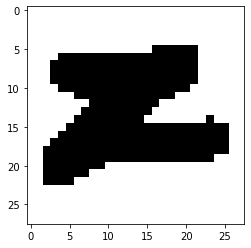

25 z


In [21]:
# select a random image to test prediction
label,character,index = showRandomImageFrom(images=trainer.test_images,labels=trainer.test_labels)

inp (1, 28, 28)


('z', 25)

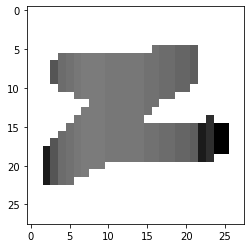

In [22]:
# check prediction for above selected image
char,pred = trainer.predict_one(inp=trainer.test_images[index],get_char=True,show_image=True)
char,pred

In [23]:
pred,trainer.get_char_from_pred(pred)

(25, 'z')

In [24]:
# summarise model
trainer.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Creating model folder
!mkdir model
# saving trained model to 'model' folder with name 'model.h5'
trainer.save_model(path='model/model.h5')

In [30]:
# creating a new trainer instance that will be used to test the saved trainer
# only need to pass the testing data here
saved_trainer = Trainer(x_train=[],y_train=[],x_test=[],y_test=[])

In [31]:
# load the saved model in the saved_trainer instance
saved_trainer.load_model(path='model/model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [32]:
# evaluate model. should give same result as the evaluation of trained model
saved_trainer.evaluate(x_test=test_images,y_test=test_labels,add_to_label=-1)
# something might be wrong here

(35.11833460820409, 0.1375)

In [34]:
# save as tfjs model
trainer.save_model('tfjs_model',tfjs_format=True)

inp (1, 28, 28)


('a', 0)

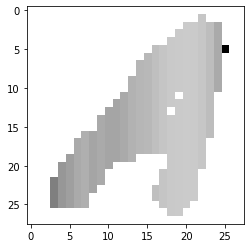

In [35]:
# predict the same character in cell 10
char,pred = saved_trainer.predict_one(inp=trainer.test_images[1],normalize=True,show_image=True)
#pred,trainer.get_char_from_pred(pred)
char, int(pred)

In [70]:
import json
with open('timfile.json','w+',encoding='utf-8') as f:
    json.dump({'array':test_images[1]},fp=f)

In [36]:
tensor = [
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0
]

In [37]:
len(tensor)

784

inp (1, 28, 28)


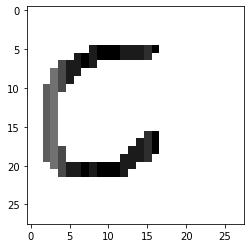

In [44]:
pred = saved_trainer.predict_one(tensor,show_image=True,normalize=True,only_best=False)

In [45]:
pred

('j', array([1.4999457e-02, 3.3753772e-12, 2.3250216e-08, 1.2248864e-09,
        7.8106083e-16, 1.0012360e-10, 1.2967579e-02, 8.3162447e-18,
        7.3818340e-11, 9.7199774e-01, 1.7599205e-29, 5.6063924e-20,
        8.1311754e-30, 2.6822500e-09, 8.8520284e-09, 7.1005780e-24,
        1.1352987e-05, 5.6511664e-18, 2.2734630e-05, 2.3969694e-15,
        1.9547265e-19, 1.0820947e-21, 1.7310105e-21, 8.7094996e-18,
        5.6320838e-12, 1.1987216e-06], dtype=float32))

In [46]:
pred[1]

array([1.4999457e-02, 3.3753772e-12, 2.3250216e-08, 1.2248864e-09,
       7.8106083e-16, 1.0012360e-10, 1.2967579e-02, 8.3162447e-18,
       7.3818340e-11, 9.7199774e-01, 1.7599205e-29, 5.6063924e-20,
       8.1311754e-30, 2.6822500e-09, 8.8520284e-09, 7.1005780e-24,
       1.1352987e-05, 5.6511664e-18, 2.2734630e-05, 2.3969694e-15,
       1.9547265e-19, 1.0820947e-21, 1.7310105e-21, 8.7094996e-18,
       5.6320838e-12, 1.1987216e-06], dtype=float32)

In [47]:
pred = pred[1]

In [48]:
pred[3]

1.2248864e-09